<a href="https://colab.research.google.com/github/moutayam/cvai/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Data Preparation

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# LeNet5 Architecture

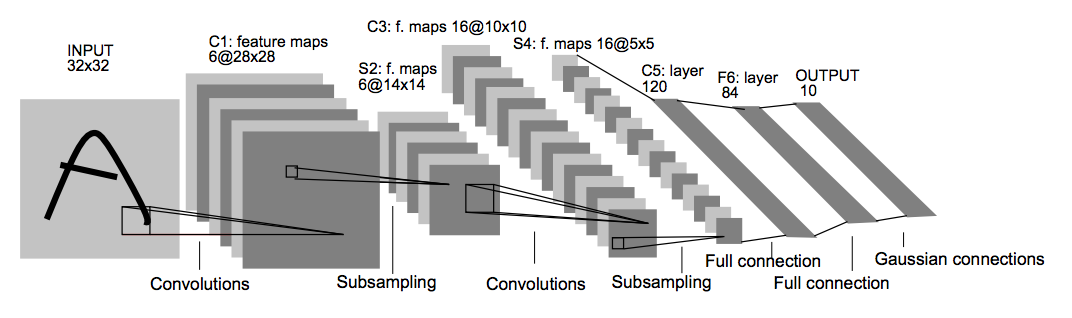

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(3, 3), activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation="relu"),
        layers.Dense(84, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

# Training

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 13s 8ms/step - loss: 0.4062 - accuracy: 0.8830 - val_loss: 0.1149 - val_accuracy: 0.9703
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1130 - accuracy: 0.9662 - val_loss: 0.0795 - val_accuracy: 0.9787
Epoch 3/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0797 - accuracy: 0.9757 - val_loss: 0.0691 - val_accuracy: 0.9818
Epoch 4/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0625 - accuracy: 0.9805 - val_loss: 0.0627 - val_accuracy: 0.9840
Epoch 5/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0560 - val_accuracy: 0.9862
Epoch 6/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0454 - accuracy: 0.9864 - val_loss: 0.0475 - val_accuracy: 0.9873
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0492 - val_accuracy: 0.9877
Epoch

# Evaluation

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03198722377419472
Test accuracy: 0.989799976348877


# Time for upgrades :)

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # layers.Conv2D(6, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)), # AveragePooling2D
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)), # AveragePooling2D
        layers.Flatten(),
        layers.Dropout(0.5), # Two more additional Dense layers
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [7]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 6s 12ms/step - loss: 0.3699 - accuracy: 0.8847 - val_loss: 0.0845 - val_accuracy: 0.9772
Epoch 2/15
422/422 [==============================] - 4s 11ms/step - loss: 0.1108 - accuracy: 0.9659 - val_loss: 0.0560 - val_accuracy: 0.9838
Epoch 3/15
422/422 [==============================] - 5s 11ms/step - loss: 0.0828 - accuracy: 0.9741 - val_loss: 0.0451 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 5s 11ms/step - loss: 0.0708 - accuracy: 0.9779 - val_loss: 0.0391 - val_accuracy: 0.9875
Epoch 5/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0621 - accuracy: 0.9800 - val_loss: 0.0400 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 5s 11ms/step - loss: 0.0572 - accuracy: 0.9822 - val_loss: 0.0353 - val_accuracy: 0.9895
Epoch 7/15
422/422 [==============================] - 5s 11ms/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0369 - val_accuracy: 0.9895

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026945525780320168
Test accuracy: 0.9909999966621399
